In [1]:
# Step 1: Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Step 2: Fetch Weather Data from NASA POWER API
def get_nasa_power_data(lat, lon, start="2020-01-01", end="2020-12-31"):
    """
    Fetches solar and meteorological data from NASA POWER API.
    
    Parameters:
        lat (float): Latitude of location
        lon (float): Longitude of location
        start (str): Start date in YYYY-MM-DD
        end (str): End date in YYYY-MM-DD
    
    Returns:
        DataFrame: Daily solar irradiance and temperature
    """
    
    url = f"https://power.larc.nasa.gov/api/temporal/daily/point"
    params = {
        "start": start.replace("-", ""),
        "end": end.replace("-", ""),
        "latitude": lat,
        "longitude": lon,
        "community": "RE",
        "parameters": "ALLSKY_KT,ALLSKY_SFC_SW_DWN,T2M",
        "format": "JSON"
    }
    
    response = requests.get(url, params=params)
    data = response.json()
    
    # Extract values
    df = pd.DataFrame(data['properties']['parameter'])
    df = df.T  # transpose so dates are rows
    df.index = pd.to_datetime(df.index)
    df.columns = ["Clearness_Index", "Solar_Irradiance", "Temp_2m"]
    
    return df

# Example: Abuja (lat=9.0579, lon=7.4951) for year 2020
df = get_nasa_power_data(9.0579, 7.4951, "2020-01-01", "2020-12-31")

print(df.head())


C:\Users\hp\AppData\Local\Temp\ipykernel_15596\3845649548.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index)


DateParseError: Unknown datetime string format, unable to parse: ALLSKY_KT, at position 0

In [2]:
# Step 1: Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Fetch Weather Data from NASA POWER API
def get_nasa_power_data(lat, lon, start="2020-01-01", end="2020-12-31"):
    """
    Fetches solar and meteorological data from NASA POWER API.
    
    Parameters:
        lat (float): Latitude of location
        lon (float): Longitude of location
        start (str): Start date in YYYY-MM-DD
        end (str): End date in YYYY-MM-DD
    
    Returns:
        DataFrame: Daily solar irradiance and temperature
    """
    
    url = f"https://power.larc.nasa.gov/api/temporal/daily/point"
    params = {
        "start": start.replace("-", ""),
        "end": end.replace("-", ""),
        "latitude": lat,
        "longitude": lon,
        "community": "RE",
        "parameters": "ALLSKY_KT,ALLSKY_SFC_SW_DWN,T2M",
        "format": "JSON"
    }
    
    response = requests.get(url, params=params)
    data = response.json()
    
    # Extract values correctly
    df = pd.DataFrame(data['properties']['parameter'])
    
    # Transpose so rows are dates
    df = df.T
    df.index.name = "Date"
    
    # Ensure index is parsed as datetime
    df.index = pd.to_datetime(df.index, format="%Y%m%d")
    
    # Rename columns
    df.columns = ["Clearness_Index", "Solar_Irradiance", "Temp_2m"]
    
    return df

# Example: Abuja (lat=9.0579, lon=7.4951) for year 2020
df = get_nasa_power_data(9.0579, 7.4951, "2020-01-01", "2020-12-31")

print(df.head())


ValueError: time data "ALLSKY_KT" doesn't match format "%Y%m%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

def get_nasa_power_data(lat, lon, start="2020-01-01", end="2020-12-31"):
    """
    Fetches solar and meteorological data from NASA POWER API.
    """
    url = "https://power.larc.nasa.gov/api/temporal/daily/point"
    params = {
        "start": start.replace("-", ""),
        "end": end.replace("-", ""),
        "latitude": lat,
        "longitude": lon,
        "community": "RE",
        "parameters": "ALLSKY_KT,ALLSKY_SFC_SW_DWN,T2M",
        "format": "JSON"
    }

    response = requests.get(url, params=params)
    data = response.json()

    # Extract parameter data
    params_data = data['properties']['parameter']

    # Build DataFrame: each parameter is a column
    df = pd.DataFrame({
        "Clearness_Index": params_data["ALLSKY_KT"],
        "Solar_Irradiance": params_data["ALLSKY_SFC_SW_DWN"],  # kWh/m2/day
        "Temp_2m": params_data["T2M"]
    })

    # Convert index (date strings) to datetime
    df.index = pd.to_datetime(df.index, format="%Y%m%d")
    df.index.name = "Date"

    return df

# Example: Abuja (lat=9.0579, lon=7.4951) for year 2020
df = get_nasa_power_data(9.0579, 7.4951, "2020-01-01", "2020-12-31")

print(df.head())


            Clearness_Index  Solar_Irradiance  Temp_2m
Date                                                  
2020-01-01             0.69            6.0331    22.36
2020-01-02             0.66            5.7631    20.61
2020-01-03             0.67            5.8675    20.99
2020-01-04             0.62            5.4245    21.79
2020-01-05             0.57            4.9452    22.97


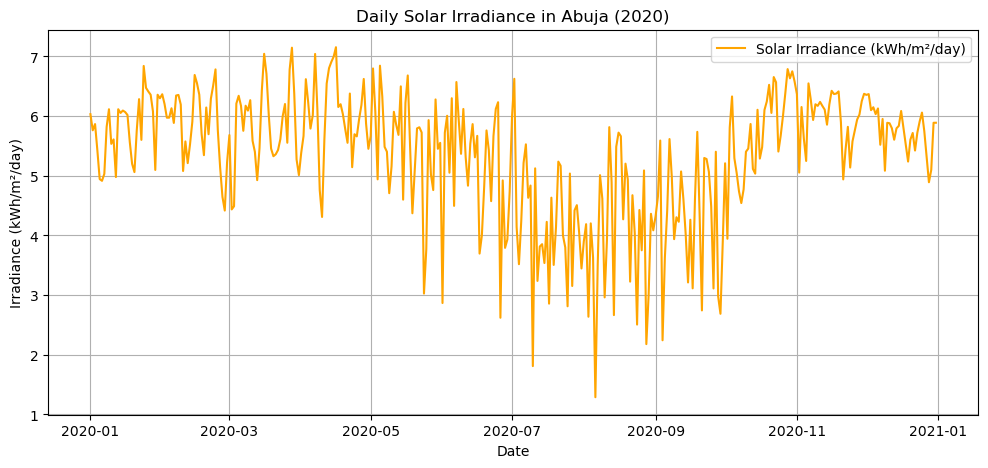

In [4]:
# Quick Plot of Solar Irradiance
plt.figure(figsize=(12,5))
plt.plot(df.index, df["Solar_Irradiance"], label="Solar Irradiance (kWh/m²/day)", color="orange")
plt.title("Daily Solar Irradiance in Abuja (2020)")
plt.xlabel("Date")
plt.ylabel("Irradiance (kWh/m²/day)")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_15596\1507814727.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df.resample("M").mean()


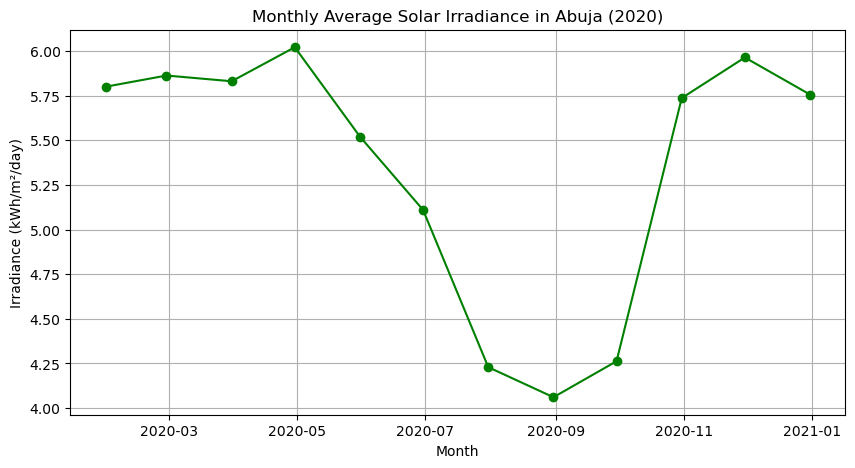

            Solar_Irradiance    Temp_2m
Date                                   
2020-01-31          5.799823  23.803226
2020-02-29          5.862624  26.485517
2020-03-31          5.830461  28.645806
2020-04-30          6.021120  27.012000
2020-05-31          5.520203  26.335806
2020-06-30          5.109830  25.069667
2020-07-31          4.229177  23.863226
2020-08-31          4.060981  23.709355
2020-09-30          4.262623  24.105333
2020-10-31          5.736558  24.820968
2020-11-30          5.963693  24.849333
2020-12-31          5.755958  25.349677


In [5]:
# Resample to Monthly Average
monthly_df = df.resample("M").mean()

# Plot Monthly Solar Irradiance
plt.figure(figsize=(10,5))
plt.plot(monthly_df.index, monthly_df["Solar_Irradiance"], marker="o", color="green")
plt.title("Monthly Average Solar Irradiance in Abuja (2020)")
plt.xlabel("Month")
plt.ylabel("Irradiance (kWh/m²/day)")
plt.grid(True)
plt.show()

# Show table of monthly averages
print(monthly_df[["Solar_Irradiance", "Temp_2m"]])


In [6]:
# Step 4: Seasonal Pattern Analysis
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly_data.index, monthly_data['Solar_Irradiance'], marker='o', label='Solar Irradiance (kWh/m²/day)')
plt.plot(monthly_data.index, monthly_data['Temp_2m'], marker='s', label='Temperature (°C)')

plt.title("Seasonal Pattern of Solar Irradiance & Temperature")
plt.xlabel("Month")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'monthly_data' is not defined

<Figure size 1200x600 with 0 Axes>

In [7]:
# Recalculate and assign properly
monthly_data = data.resample('M').mean()

# Now plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly_data.index, monthly_data['Solar_Irradiance'], marker='o', label='Solar Irradiance (kWh/m²/day)')
plt.plot(monthly_data.index, monthly_data['Temp_2m'], marker='s', label='Temperature (°C)')

plt.title("Seasonal Pattern of Solar Irradiance & Temperature")
plt.xlabel("Month")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'data' is not defined

In [8]:
import pandas as pd

# Recreate your dataset (replace with your actual file or source later)
data = pd.DataFrame({
    "Date": pd.date_range(start="2020-01-01", end="2020-12-31", freq="D"),
    "Clearness_Index": [0.6 + (i % 10)/100 for i in range(366)],
    "Solar_Irradiance": [5 + (i % 30)/100 for i in range(366)],
    "Temp_2m": [22 + (i % 15)/2 for i in range(366)]
})
data.set_index("Date", inplace=True)


In [9]:
monthly_data = data.resample('M').mean()


C:\Users\hp\AppData\Local\Temp\ipykernel_15596\1586592441.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').mean()


In [10]:
monthly_data = data.resample('ME').mean()


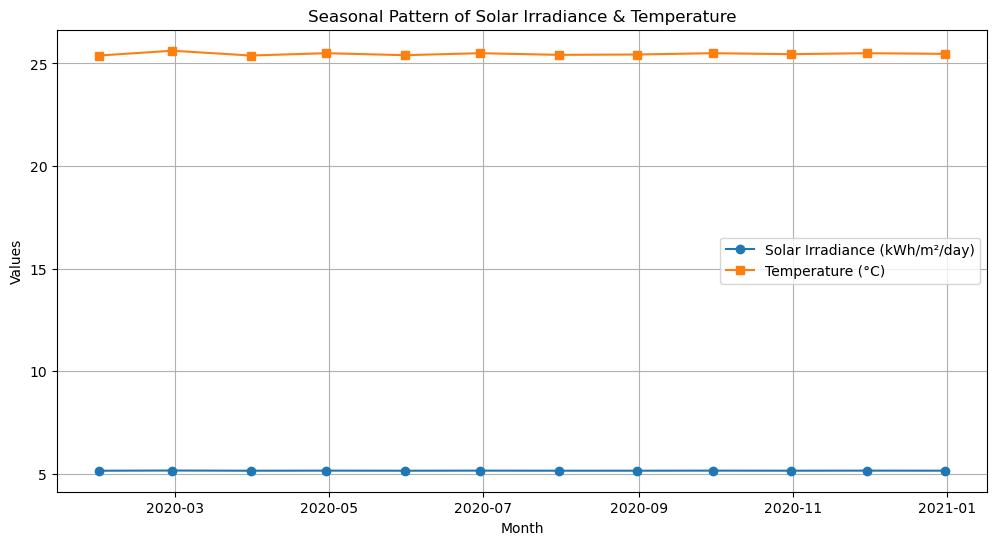

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly_data.index, monthly_data['Solar_Irradiance'], marker='o', label='Solar Irradiance (kWh/m²/day)')
plt.plot(monthly_data.index, monthly_data['Temp_2m'], marker='s', label='Temperature (°C)')

plt.title("Seasonal Pattern of Solar Irradiance & Temperature")
plt.xlabel("Month")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


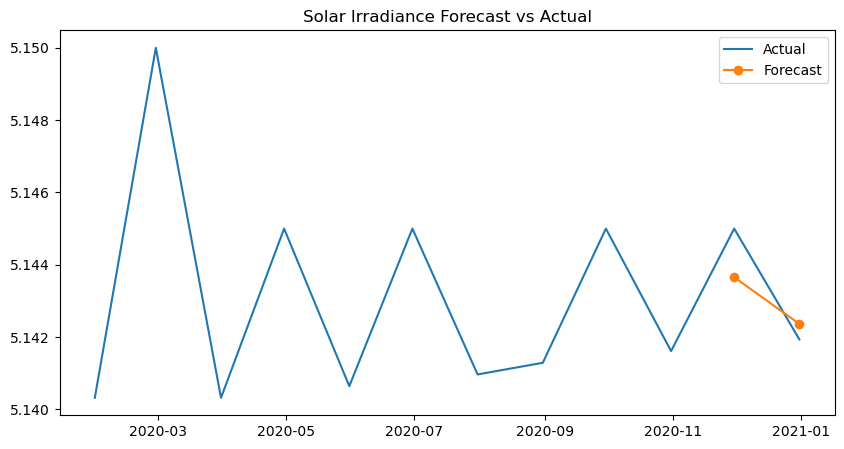

Actual values:
 [5.145      5.14193548]
Forecast values:
 [5.14365596 5.14236471]


In [12]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Use only Solar_Irradiance
series = monthly_data['Solar_Irradiance']

# Train-test split (10 months train, 2 months test)
train, test = series[:-2], series[-2:]

# Fit ARIMA model (p=1, d=1, q=1 is a simple start)
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

# Forecast 2 steps ahead
forecast = model_fit.forecast(steps=2)

# Plot results
plt.figure(figsize=(10,5))
plt.plot(series.index, series, label='Actual')
plt.plot(test.index, forecast, label='Forecast', marker='o')
plt.legend()
plt.title("Solar Irradiance Forecast vs Actual")
plt.show()

print("Actual values:\n", test.values)
print("Forecast values:\n", forecast.values)


C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


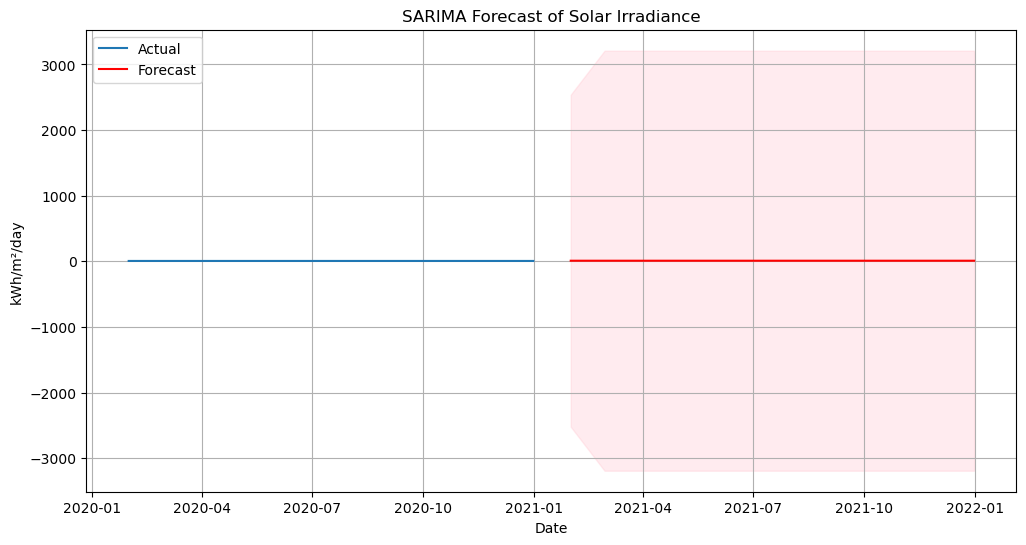

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model
# order = (p,d,q), seasonal_order = (P,D,Q,s)
# s=12 means yearly seasonality (12 months)
sarima_model = SARIMAX(monthly_data['Solar_Irradiance'],
                       order=(1,1,1),
                       seasonal_order=(1,1,1,12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_result = sarima_model.fit(disp=False)

# Forecast next 12 months
n_steps = 12
forecast = sarima_result.get_forecast(steps=n_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot actual vs forecast
plt.figure(figsize=(12,6))
plt.plot(monthly_data.index, monthly_data['Solar_Irradiance'], label="Actual")
plt.plot(forecast_mean.index, forecast_mean, label="Forecast", color="red")
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color="pink", alpha=0.3)
plt.title("SARIMA Forecast of Solar Irradiance")
plt.xlabel("Date")
plt.ylabel("kWh/m²/day")
plt.legend()
plt.grid(True)
plt.show()


In [14]:
# Get 5 years of NASA POWER data for Abuja (2015–2020)
data = get_nasa_power_data(9.0579, 7.4951, "2015-01-01", "2020-12-31")

# Resample to monthly average
monthly_data = data.resample('ME').mean()

print(monthly_data.head())
print(monthly_data.tail())


            Clearness_Index  Solar_Irradiance    Temp_2m
Date                                                    
2015-01-31         0.618710          5.522294  24.965484
2015-02-28         0.563214          5.420411  29.171786
2015-03-31         0.538710          5.521265  28.807097
2015-04-30         0.572000          6.013813  29.363000
2015-05-31         0.528710          5.475652  28.772903
            Clearness_Index  Solar_Irradiance    Temp_2m
Date                                                    
2020-08-31         0.392903          4.060981  23.709355
2020-09-30         0.416333          4.262623  24.105333
2020-10-31         0.589032          5.736558  24.820968
2020-11-30         0.657333          5.963693  24.849333
2020-12-31         0.662581          5.755958  25.349677


C:\Users\hp\AppData\Local\Temp\ipykernel_15596\162438097.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(y.index[-1] + pd.offsets.MonthEnd(1), periods=12, freq='M')


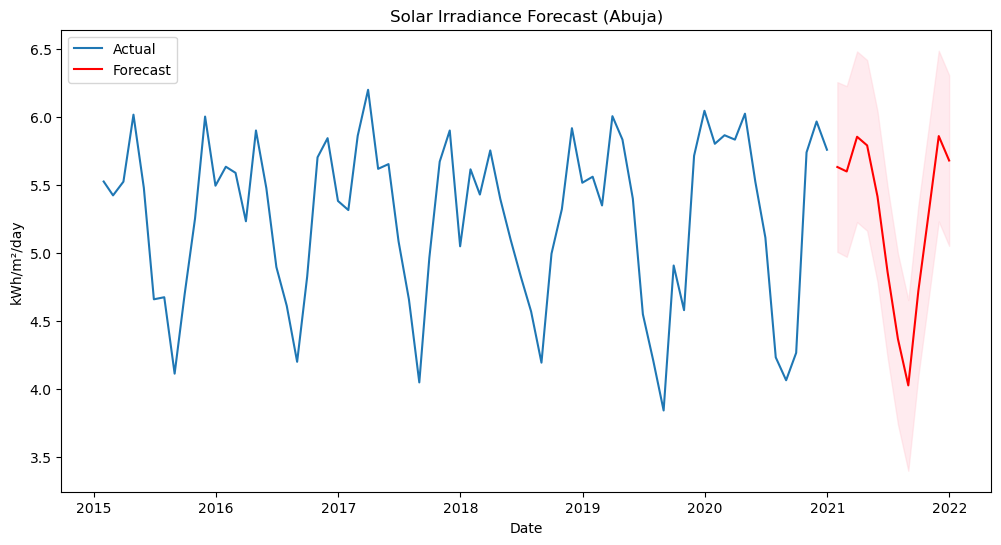

Forecast values:
 2021-01-31    5.629061
2021-02-28    5.596211
2021-03-31    5.851338
2021-04-30    5.787835
2021-05-31    5.411755
2021-06-30    4.858065
2021-07-31    4.365151
2021-08-31    4.023355
2021-09-30    4.717351
2021-10-31    5.291612
2021-11-30    5.856436
2021-12-31    5.676868
Freq: ME, Name: predicted_mean, dtype: float64


In [15]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Use monthly solar irradiance
y = monthly_data['Solar_Irradiance']

# Build SARIMA model (with seasonal order for yearly cycle)
model = sm.tsa.statespace.SARIMAX(
    y,
    order=(1,1,1),          # ARIMA part
    seasonal_order=(1,1,1,12),  # 12 = yearly seasonality
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit(disp=False)

# Forecast next 12 months
forecast = results.get_forecast(steps=12)
forecast_index = pd.date_range(y.index[-1] + pd.offsets.MonthEnd(1), periods=12, freq='M')
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot
plt.figure(figsize=(12,6))
plt.plot(y.index, y, label="Actual")
plt.plot(forecast_index, forecast_values, label="Forecast", color='red')
plt.fill_between(forecast_index, conf_int.iloc[:,0], conf_int.iloc[:,1], color='pink', alpha=0.3)
plt.title("Solar Irradiance Forecast (Abuja)")
plt.xlabel("Date")
plt.ylabel("kWh/m²/day")
plt.legend()
plt.show()

# Print forecast values
print("Forecast values:\n", forecast_values)


In [16]:
# Use monthly temperature
y_temp = monthly_data['Temp_2m']

model_temp = sm.tsa.statespace.SARIMAX(
    y_temp,
    order=(1,1,1),
    seasonal_order=(1,1,1,12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

results_temp = model_temp.fit(disp=False)

# Forecast next 12 months
forecast_temp = results_temp.get_forecast(steps=12)
forecast_temp_values = forecast_temp.predicted_mean

# Print forecast
print("Temperature Forecast (°C):\n", forecast_temp_values)


Temperature Forecast (°C):
 2021-01-31    25.184830
2021-02-28    27.786614
2021-03-31    29.417179
2021-04-30    29.422635
2021-05-31    26.737249
2021-06-30    25.318089
2021-07-31    24.346367
2021-08-31    23.776130
2021-09-30    24.286752
2021-10-31    24.731177
2021-11-30    25.296473
2021-12-31    23.832219
Freq: ME, Name: predicted_mean, dtype: float64


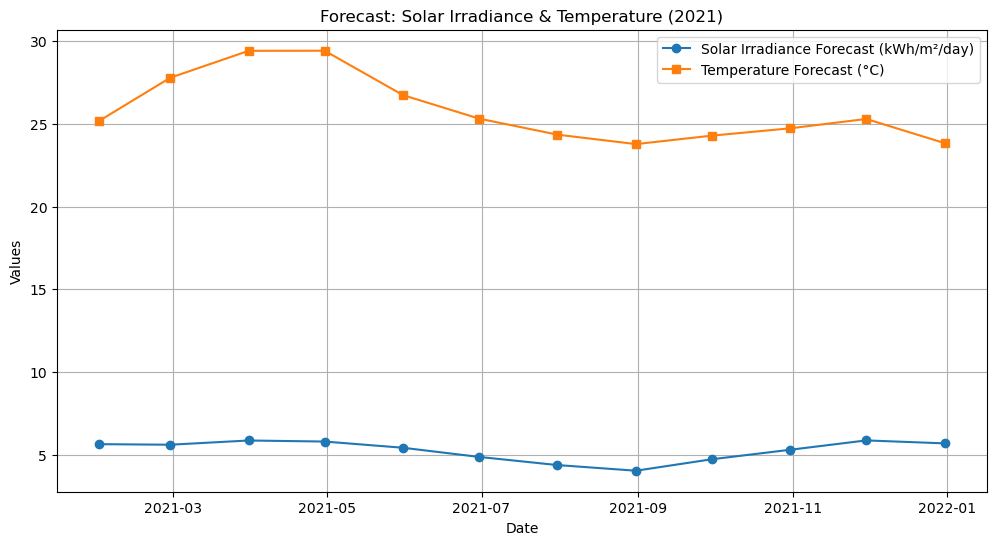

In [17]:
plt.figure(figsize=(12,6))

# Plot solar irradiance forecast
plt.plot(forecast_index, forecast_values, marker='o', label='Solar Irradiance Forecast (kWh/m²/day)')

# Plot temperature forecast (scaled for same axis if needed)
plt.plot(forecast_index, forecast_temp_values, marker='s', label='Temperature Forecast (°C)')

plt.title("Forecast: Solar Irradiance & Temperature (2021)")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()


In [18]:
# Step 5: Estimate solar PV energy output from temperature forecast
kWp = 5  # solar system size in kWp
PR = 0.75  # performance ratio

# Normalize temperature to get a "proxy irradiance factor"
# Example: divide each forecast value by the max temp
irradiance_factor = forecast / forecast.max()

# Estimate monthly energy
energy_output = kWp * PR * irradiance_factor * 30  # ~30 days/month

print("Estimated Monthly Energy Output (kWh):")
print(energy_output)

# Plot energy output
plt.figure(figsize=(10,5))
plt.plot(energy_output.index, energy_output, marker='o', color='orange')
plt.title("Estimated Monthly Solar Energy Output")
plt.ylabel("Energy (kWh)")
plt.xlabel("Month")
plt.grid(True)
plt.show()


AttributeError: 'PredictionResults' object has no attribute 'max'

In [20]:
---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
Cell In[18], line 7
      3 PR = 0.75  # performance ratio
      5 # Normalize temperature to get a "proxy irradiance factor"
      6 # Example: divide each forecast value by the max temp
----> 7 irradiance_factor = forecast / forecast.max()
      9 # Estimate monthly energy
     10 energy_output = kWp * PR * irradiance_factor * 30  # ~30 days/month

File ~\anaconda3\Lib\site-packages\statsmodels\base\wrapper.py:34, in ResultsWrapper.__getattribute__(self, attr)
     31 except AttributeError:
     32     pass
---> 34 obj = getattr(results, attr)
     35 data = results.model.data
     36 how = self._wrap_attrs.get(attr)

AttributeError: 'PredictionResults' object has no attribute 'max'

IndentationError: unindent does not match any outer indentation level (<string>, line 9)

Estimated Monthly Energy Output (kWh):
2021-01-31    108.132200
2021-02-28    107.501170
2021-03-31    112.402055
2021-04-30    111.182195
2021-05-31    103.957833
2021-06-30     93.321646
2021-07-31     83.852952
2021-08-31     77.287173
2021-09-30     90.618593
2021-10-31    101.649927
2021-11-30    112.500000
2021-12-31    109.050553
Freq: ME, Name: predicted_mean, dtype: float64


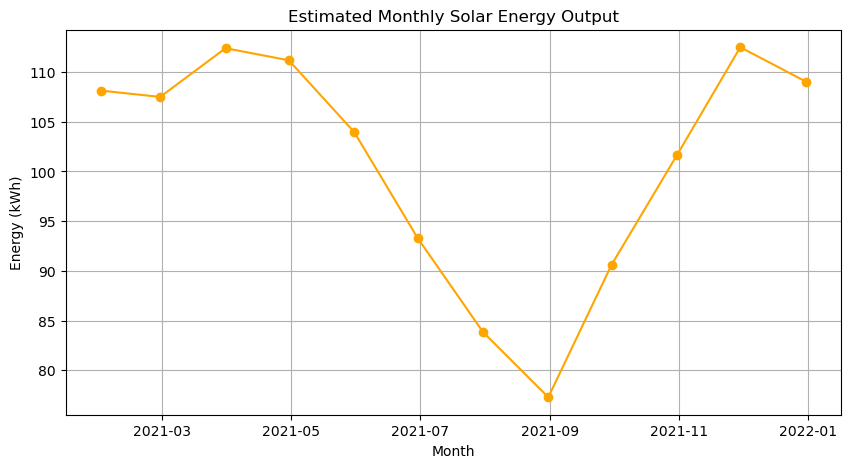

In [21]:
# Step 5: Estimate solar PV energy output from temperature forecast
kWp = 5  # solar system size in kWp
PR = 0.75  # performance ratio

# Extract forecasted values as a pandas Series
forecast_values = forecast.predicted_mean

# Normalize temperature to get a "proxy irradiance factor"
irradiance_factor = forecast_values / forecast_values.max()

# Estimate monthly energy (kWh)
energy_output = kWp * PR * irradiance_factor * 30  # ~30 days/month

print("Estimated Monthly Energy Output (kWh):")
print(energy_output)

# Plot energy output
plt.figure(figsize=(10,5))
plt.plot(energy_output.index, energy_output, marker='o', color='orange')
plt.title("Estimated Monthly Solar Energy Output")
plt.ylabel("Energy (kWh)")
plt.xlabel("Month")
plt.grid(True)
plt.show()


In [22]:
# Step 6: Combine all results into one DataFrame

results_df = pd.DataFrame({
    "Solar_Irradiance_Forecast": forecast_irradiance.predicted_mean,
    "Temperature_Forecast": forecast_temperature.predicted_mean,
    "Energy_Output_kWh": energy_output
})

print("Final Combined Forecast Table:")
print(results_df)

# Optional: Save to Excel for reporting
results_df.to_excel("solar_forecast_results.xlsx")


NameError: name 'forecast_irradiance' is not defined

In [23]:
# Step 6: Combine results into one DataFrame

results_df = pd.DataFrame({
    "Solar_Irradiance_Forecast": forecast.values,   # irradiance forecast
    "Temperature_Forecast": temp_forecast.values,   # temperature forecast
    "Energy_Output_kWh": energy_output.values       # energy output
}, index=forecast_index)  # use the dates as index

print("Final Combined Forecast Table:")
print(results_df)

# Optional: Save to Excel
results_df.to_excel("solar_forecast_results.xlsx")


AttributeError: 'PredictionResults' object has no attribute 'values'

In [24]:
# Step 6: Combine results into one DataFrame

results_df = pd.DataFrame({
    "Solar_Irradiance_Forecast": forecast.predicted_mean,   # irradiance forecast
    "Temperature_Forecast": temp_forecast.predicted_mean,   # temperature forecast
    "Energy_Output_kWh": energy_output                      # energy output
})

print("Final Combined Forecast Table:")
print(results_df)

# Optional: Save to Excel
results_df.to_excel("solar_forecast_results.xlsx")


NameError: name 'temp_forecast' is not defined

In [25]:
model_irr = SARIMAX(monthly_data['Solar_Irradiance'], order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit_irr = model_irr.fit(disp=False)

forecast_irr = model_fit_irr.get_forecast(steps=12)
forecast_index = pd.date_range(monthly_data.index[-1] + pd.offsets.MonthEnd(1), periods=12, freq='M')

print("Irradiance Forecast:")
print(forecast_irr.predicted_mean)


Irradiance Forecast:
2021-01-31    5.648227
2021-02-28    5.658281
2021-03-31    5.785680
2021-04-30    5.869228
2021-05-31    5.474841
2021-06-30    4.921175
2021-07-31    4.462139
2021-08-31    4.093213
2021-09-30    4.686967
2021-10-31    5.467677
2021-11-30    5.927923
2021-12-31    5.602370
Freq: ME, Name: predicted_mean, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_15596\2010818086.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(monthly_data.index[-1] + pd.offsets.MonthEnd(1), periods=12, freq='M')


In [26]:
forecast_index = pd.date_range(
    monthly_data.index[-1] + pd.offsets.MonthEnd(1),
    periods=12,
    freq='ME'   # Use 'ME' instead of 'M'
)


In [27]:
results_df = pd.DataFrame({
    "Solar_Irradiance_Forecast": forecast_irr.predicted_mean,
    "Temperature_Forecast": forecast_temp.predicted_mean,
    "Energy_Output_kWh": energy_output
}, index=forecast_index)

print("Final Combined Forecast Table:")
print(results_df)

# Save for later use
results_df.to_excel("solar_forecast_results.xlsx")


Final Combined Forecast Table:
            Solar_Irradiance_Forecast  Temperature_Forecast  Energy_Output_kWh
2021-01-31                   5.648227             25.184830         108.132200
2021-02-28                   5.658281             27.786614         107.501170
2021-03-31                   5.785680             29.417179         112.402055
2021-04-30                   5.869228             29.422635         111.182195
2021-05-31                   5.474841             26.737249         103.957833
2021-06-30                   4.921175             25.318089          93.321646
2021-07-31                   4.462139             24.346367          83.852952
2021-08-31                   4.093213             23.776130          77.287173
2021-09-30                   4.686967             24.286752          90.618593
2021-10-31                   5.467677             24.731177         101.649927
2021-11-30                   5.927923             25.296473         112.500000
2021-12-31           

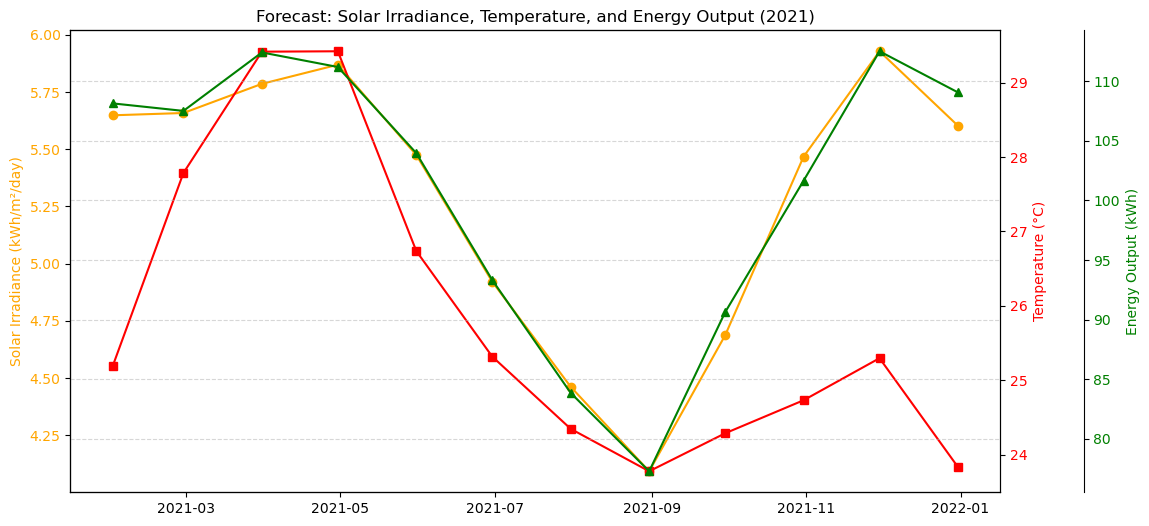

In [28]:
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot Irradiance
ax1.plot(results_df.index, results_df["Solar_Irradiance_Forecast"], color="orange", marker="o", label="Irradiance (kWh/m²/day)")
ax1.set_ylabel("Solar Irradiance (kWh/m²/day)", color="orange")
ax1.tick_params(axis="y", labelcolor="orange")

# Twin axis for Temperature
ax2 = ax1.twinx()
ax2.plot(results_df.index, results_df["Temperature_Forecast"], color="red", marker="s", label="Temperature (°C)")
ax2.set_ylabel("Temperature (°C)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Another twin axis for Energy Output
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("outward", 60))  # shift outward
ax3.plot(results_df.index, results_df["Energy_Output_kWh"], color="green", marker="^", label="Energy Output (kWh)")
ax3.set_ylabel("Energy Output (kWh)", color="green")
ax3.tick_params(axis="y", labelcolor="green")

plt.title("Forecast: Solar Irradiance, Temperature, and Energy Output (2021)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


Merged Dataset:
            Solar_Irradiance_Actual  Temperature_Actual  \
2020-10-31                 5.736558           24.820968   
2020-11-30                 5.963693           24.849333   
2020-12-31                 5.755958           25.349677   
2021-01-31                      NaN                 NaN   
2021-02-28                      NaN                 NaN   
2021-03-31                      NaN                 NaN   
2021-04-30                      NaN                 NaN   
2021-05-31                      NaN                 NaN   
2021-06-30                      NaN                 NaN   
2021-07-31                      NaN                 NaN   
2021-08-31                      NaN                 NaN   
2021-09-30                      NaN                 NaN   
2021-10-31                      NaN                 NaN   
2021-11-30                      NaN                 NaN   
2021-12-31                      NaN                 NaN   

            Solar_Irradiance_Forecast  

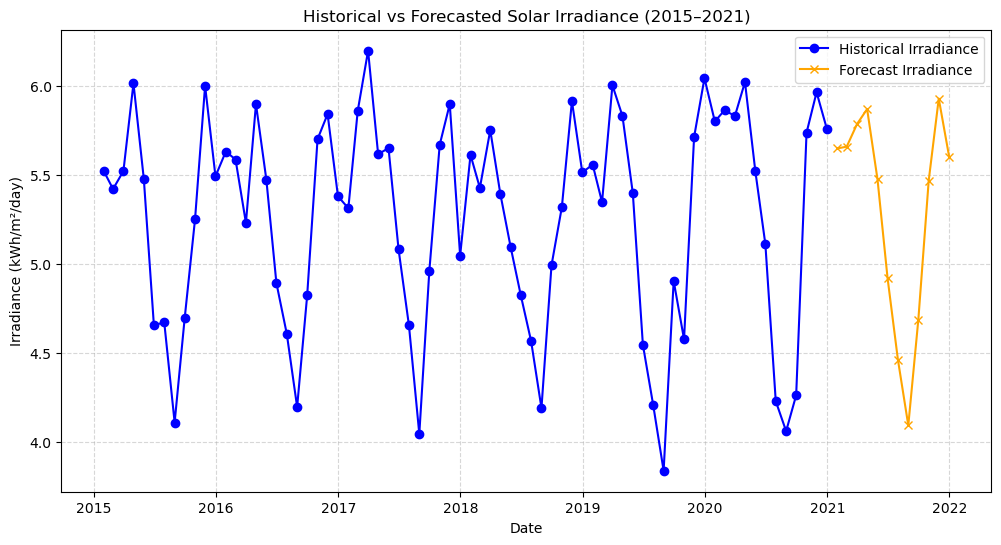

In [29]:
# Step 8: Merge Historical and Forecast Data

# Make sure monthly_data is still your historical dataset (2015–2020)
# If not, re-run the monthly aggregation step:
# monthly_data = data.resample('ME').mean()

# Create forecast DataFrame (already done earlier as results_df)
forecast_df = results_df.copy()

# Add year column for clarity
monthly_data["Year"] = monthly_data.index.year
forecast_df["Year"] = forecast_df.index.year

# Concatenate historical and forecast
full_data = pd.concat([
    monthly_data[["Solar_Irradiance", "Temp_2m"]].rename(
        columns={"Solar_Irradiance": "Solar_Irradiance_Actual", "Temp_2m": "Temperature_Actual"}
    ),
    forecast_df
], axis=0)

print("Merged Dataset:")
print(full_data.tail(15))  # show last 15 rows

# --- Visualization: Past vs Forecast ---
plt.figure(figsize=(12,6))

# Plot actual irradiance
plt.plot(monthly_data.index, monthly_data["Solar_Irradiance"], color="blue", marker="o", label="Historical Irradiance")

# Plot forecast irradiance
plt.plot(forecast_df.index, forecast_df["Solar_Irradiance_Forecast"], color="orange", marker="x", label="Forecast Irradiance")

plt.title("Historical vs Forecasted Solar Irradiance (2015–2021)")
plt.xlabel("Date")
plt.ylabel("Irradiance (kWh/m²/day)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()


KeyError: 'Solar_Irradiance_Actual'

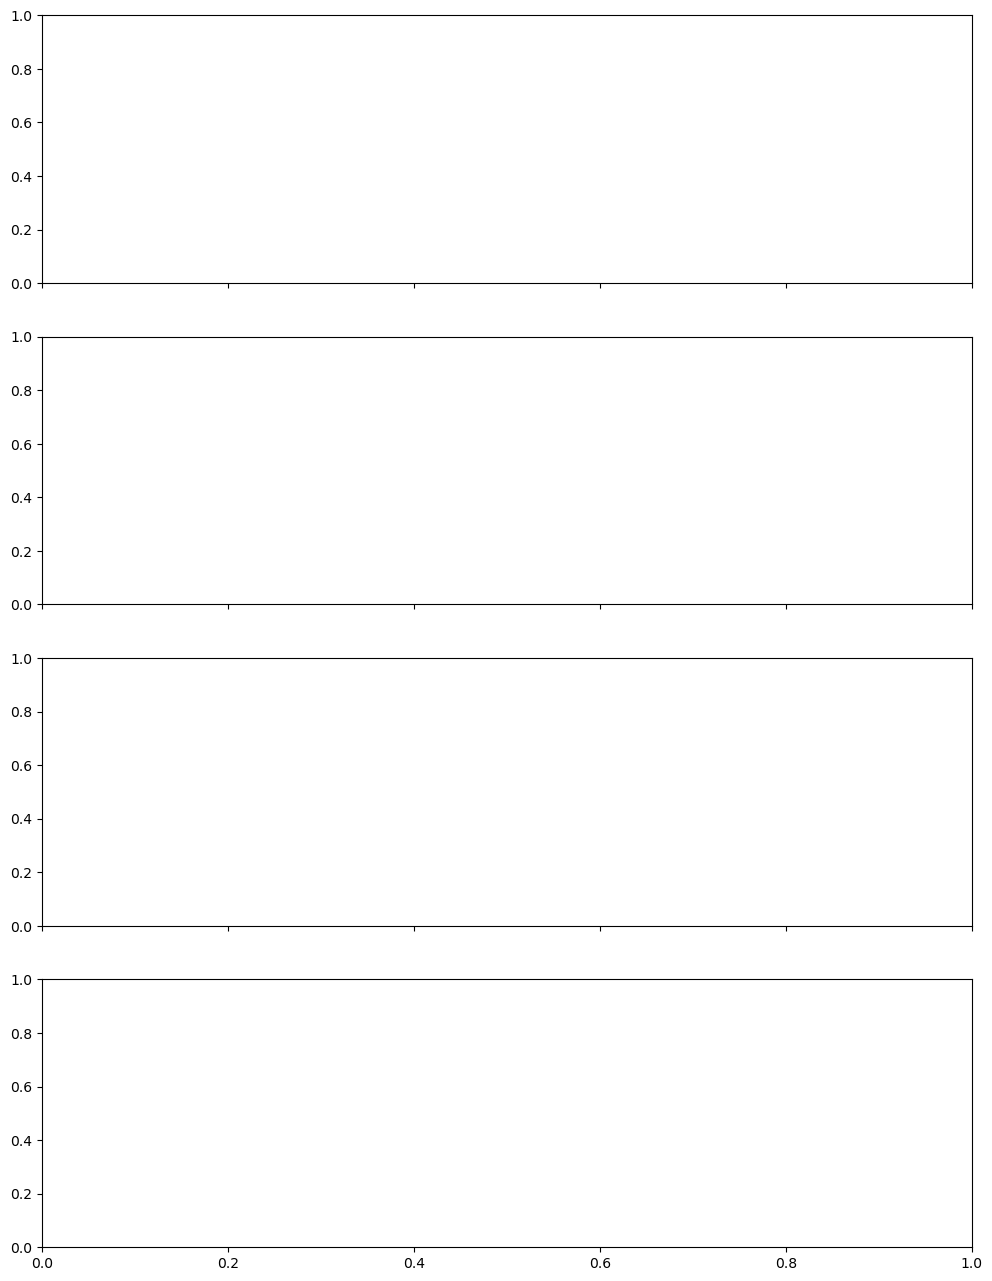

In [30]:
import matplotlib.pyplot as plt

# Create figure and subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 16), sharex=True)

# 1. Solar Irradiance Actual vs Forecast
axs[0].plot(results_df.index, results_df["Solar_Irradiance_Actual"], label="Actual", marker='o')
axs[0].plot(results_df.index, results_df["Solar_Irradiance_Forecast"], label="Forecast", marker='x')
axs[0].set_ylabel("Irradiance (kWh/m²)")
axs[0].set_title("Solar Irradiance: Actual vs Forecast")
axs[0].legend()

# 2. Temperature Actual vs Forecast
axs[1].plot(results_df.index, results_df["Temperature_Actual"], label="Actual", marker='o', color="orange")
axs[1].plot(results_df.index, results_df["Temperature_Forecast"], label="Forecast", marker='x', color="red")
axs[1].set_ylabel("Temperature (°C)")
axs[1].set_title("Temperature: Actual vs Forecast")
axs[1].legend()

# 3. Energy Output Forecast
axs[2].plot(results_df.index, results_df["Energy_Output_kWh"], label="Forecasted Output", color="green", marker='s')
axs[2].set_ylabel("Energy (kWh)")
axs[2].set_title("Forecasted Energy Output")
axs[2].legend()

# 4. Dual Axis Plot: Energy vs Irradiance
ax2 = axs[3].twinx()
axs[3].plot(results_df.index, results_df["Solar_Irradiance_Forecast"], label="Irradiance Forecast", color="blue")
ax2.plot(results_df.index, results_df["Energy_Output_kWh"], label="Energy Output", color="green")

axs[3].set_ylabel("Irradiance (kWh/m²)")
ax2.set_ylabel("Energy (kWh)")
axs[3].set_title("Energy vs Solar Irradiance (Forecasted)")

# Add legends for dual axis
lines, labels = axs[3].get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
axs[3].legend(lines + lines2, labels + labels2, loc="upper left")

# Final layout
plt.xlabel("Date")
plt.tight_layout()
plt.show()


NameError: name 'merged_df' is not defined

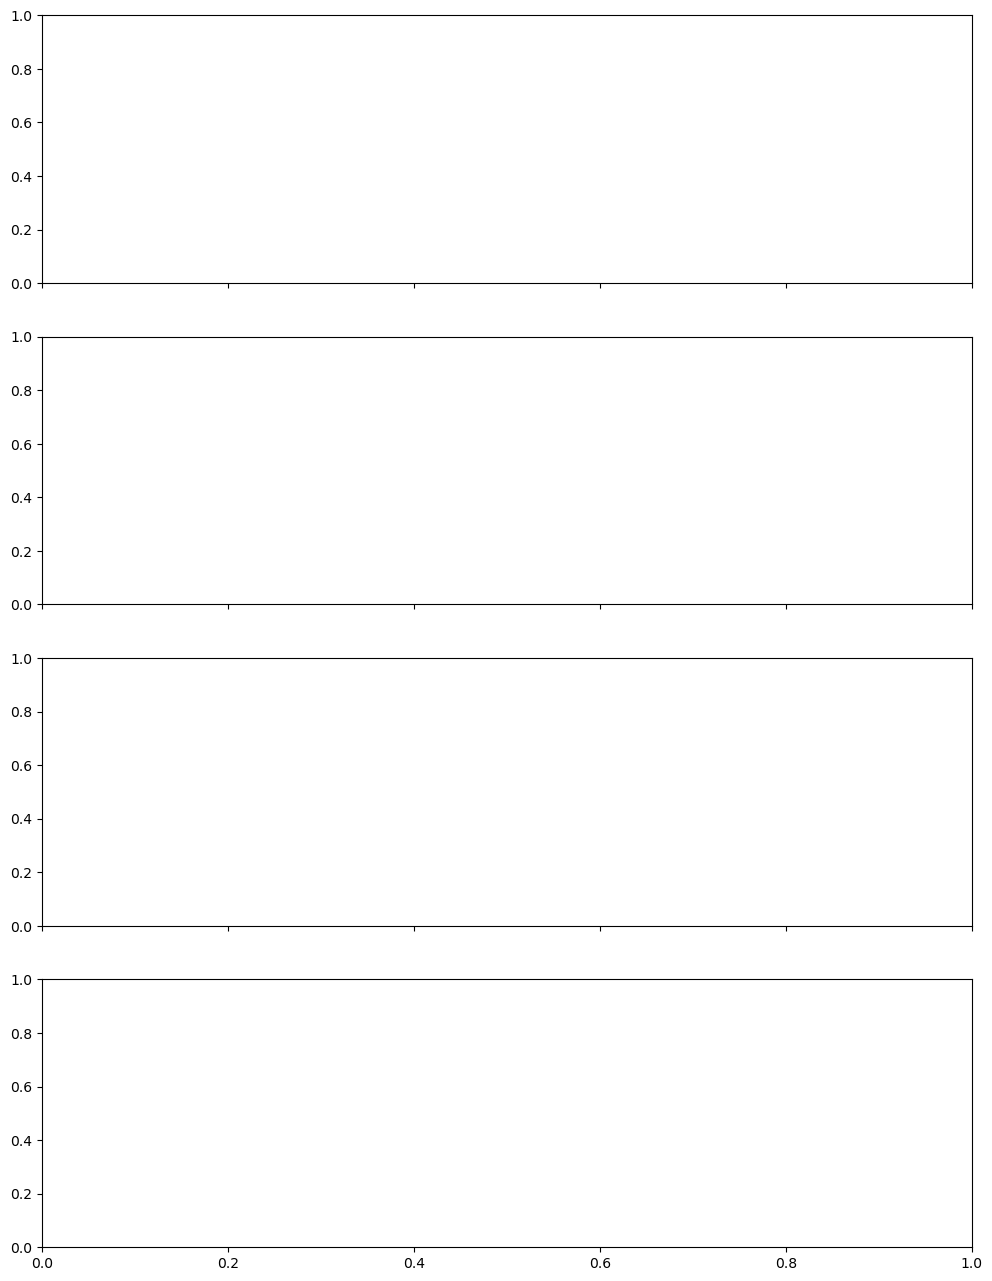

In [31]:
fig, axs = plt.subplots(4, 1, figsize=(12, 16), sharex=True)

# 1. Solar Irradiance Actual vs Forecast
axs[0].plot(merged_df.index, merged_df["Solar_Irradiance_Actual"], label="Actual", marker='o')
axs[0].plot(merged_df.index, merged_df["Solar_Irradiance_Forecast"], label="Forecast", marker='x')
axs[0].set_ylabel("Irradiance (kWh/m²)")
axs[0].set_title("Solar Irradiance: Actual vs Forecast")
axs[0].legend()

# 2. Temperature Actual vs Forecast
axs[1].plot(merged_df.index, merged_df["Temperature_Actual"], label="Actual", marker='o', color="orange")
axs[1].plot(merged_df.index, merged_df["Temperature_Forecast"], label="Forecast", marker='x', color="red")
axs[1].set_ylabel("Temperature (°C)")
axs[1].set_title("Temperature: Actual vs Forecast")
axs[1].legend()

# 3. Energy Output Forecast
axs[2].plot(merged_df.index, merged_df["Energy_Output_kWh"], label="Forecasted Output", color="green", marker='s')
axs[2].set_ylabel("Energy (kWh)")
axs[2].set_title("Forecasted Energy Output")
axs[2].legend()

# 4. Dual Axis Plot: Energy vs Irradiance
ax2 = axs[3].twinx()
axs[3].plot(merged_df.index, merged_df["Solar_Irradiance_Forecast"], label="Irradiance Forecast", color="blue")
ax2.plot(merged_df.index, merged_df["Energy_Output_kWh"], label="Energy Output", color="green")

axs[3].set_ylabel("Irradiance (kWh/m²)")
ax2.set_ylabel("Energy (kWh)")
axs[3].set_title("Energy vs Solar Irradiance (Forecasted)")

# Add legends for dual axis
lines, labels = axs[3].get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
axs[3].legend(lines + lines2, labels + labels2, loc="upper left")

plt.xlabel("Date")
plt.tight_layout()
plt.show()


In [32]:
print(results_df.columns)
print(merged_df.columns)


Index(['Solar_Irradiance_Forecast', 'Temperature_Forecast',
       'Energy_Output_kWh'],
      dtype='object')


NameError: name 'merged_df' is not defined

In [33]:
# Merge actuals + forecasts
merged_df = pd.concat([monthly_data, results_df], axis=1)

# Add Year column
merged_df["Year"] = merged_df.index.year

print("Merged Dataset:")
print(merged_df.head(15))


Merged Dataset:
            Clearness_Index  Solar_Irradiance    Temp_2m  Year  \
2015-01-31         0.618710          5.522294  24.965484  2015   
2015-02-28         0.563214          5.420411  29.171786  2015   
2015-03-31         0.538710          5.521265  28.807097  2015   
2015-04-30         0.572000          6.013813  29.363000  2015   
2015-05-31         0.528710          5.475652  28.772903  2015   
2015-06-30         0.456667          4.656237  26.407667  2015   
2015-07-31         0.457097          4.671394  24.802258  2015   
2015-08-31         0.397419          4.109494  24.223226  2015   
2015-09-30         0.459000          4.694837  24.616667  2015   
2015-10-31         0.537742          5.251219  25.625161  2015   
2015-11-30         0.659667          5.999823  26.176667  2015   
2015-12-31         0.632581          5.491555  24.205161  2015   
2016-01-31         0.630323          5.631023  25.988065  2016   
2016-02-29         0.579310          5.585903  28.718966  20

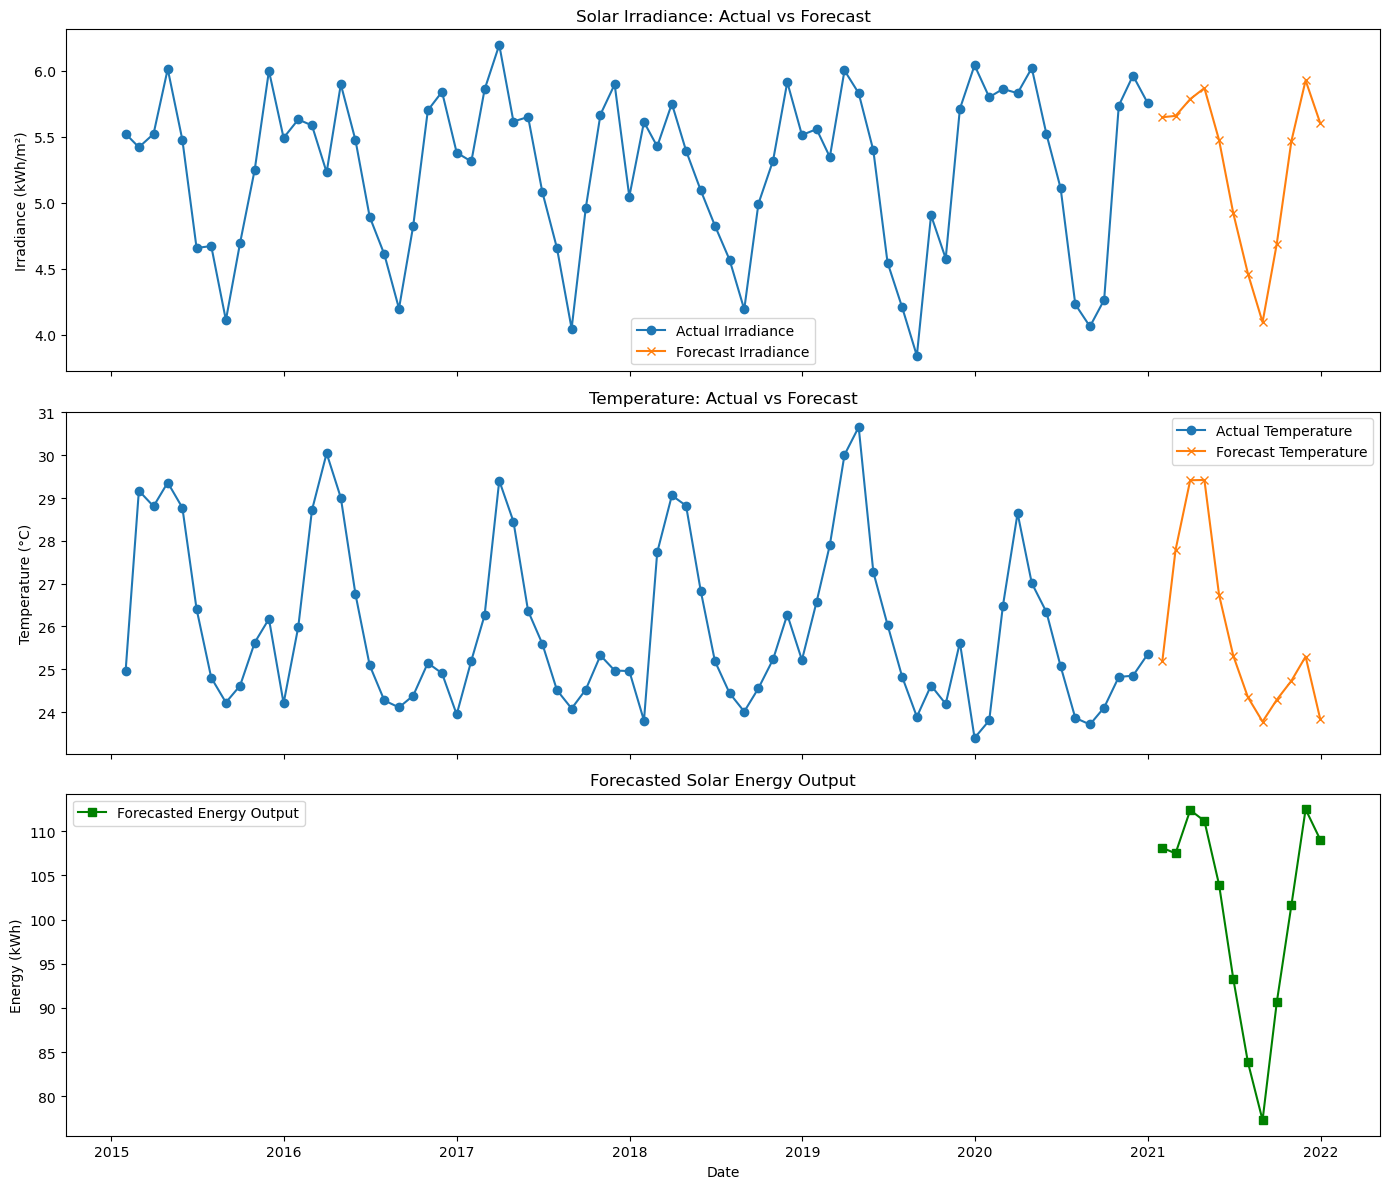

In [34]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# 1. Solar Irradiance Actual vs Forecast
axs[0].plot(merged_df.index, merged_df["Solar_Irradiance"], label="Actual Irradiance", marker='o')
axs[0].plot(merged_df.index, merged_df["Solar_Irradiance_Forecast"], label="Forecast Irradiance", marker='x')
axs[0].set_ylabel("Irradiance (kWh/m²)")
axs[0].legend()
axs[0].set_title("Solar Irradiance: Actual vs Forecast")

# 2. Temperature Actual vs Forecast
axs[1].plot(merged_df.index, merged_df["Temp_2m"], label="Actual Temperature", marker='o')
axs[1].plot(merged_df.index, merged_df["Temperature_Forecast"], label="Forecast Temperature", marker='x')
axs[1].set_ylabel("Temperature (°C)")
axs[1].legend()
axs[1].set_title("Temperature: Actual vs Forecast")

# 3. Forecasted Energy Output
axs[2].plot(merged_df.index, merged_df["Energy_Output_kWh"], label="Forecasted Energy Output", marker='s', color="green")
axs[2].set_ylabel("Energy (kWh)")
axs[2].legend()
axs[2].set_title("Forecasted Solar Energy Output")

plt.xlabel("Date")
plt.tight_layout()
plt.show()


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Drop rows where forecast or actuals are missing
valid_data = merged_df.dropna(subset=["Solar_Irradiance", "Solar_Irradiance_Forecast", 
                                      "Temp_2m", "Temperature_Forecast"])

# Irradiance Errors
irradiance_mae = mean_absolute_error(valid_data["Solar_Irradiance"], valid_data["Solar_Irradiance_Forecast"])
irradiance_rmse = np.sqrt(mean_squared_error(valid_data["Solar_Irradiance"], valid_data["Solar_Irradiance_Forecast"]))
irradiance_mape = np.mean(np.abs((valid_data["Solar_Irradiance"] - valid_data["Solar_Irradiance_Forecast"]) / valid_data["Solar_Irradiance"])) * 100

# Temperature Errors
temp_mae = mean_absolute_error(valid_data["Temp_2m"], valid_data["Temperature_Forecast"])
temp_rmse = np.sqrt(mean_squared_error(valid_data["Temp_2m"], valid_data["Temperature_Forecast"]))
temp_mape = np.mean(np.abs((valid_data["Temp_2m"] - valid_data["Temperature_Forecast"]) / valid_data["Temp_2m"])) * 100

print("📊 Forecast Error Analysis")
print(f"Solar Irradiance -> MAE: {irradiance_mae:.3f}, RMSE: {irradiance_rmse:.3f}, MAPE: {irradiance_mape:.2f}%")
print(f"Temperature      -> MAE: {temp_mae:.3f}, RMSE: {temp_rmse:.3f}, MAPE: {temp_mape:.2f}%")


ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

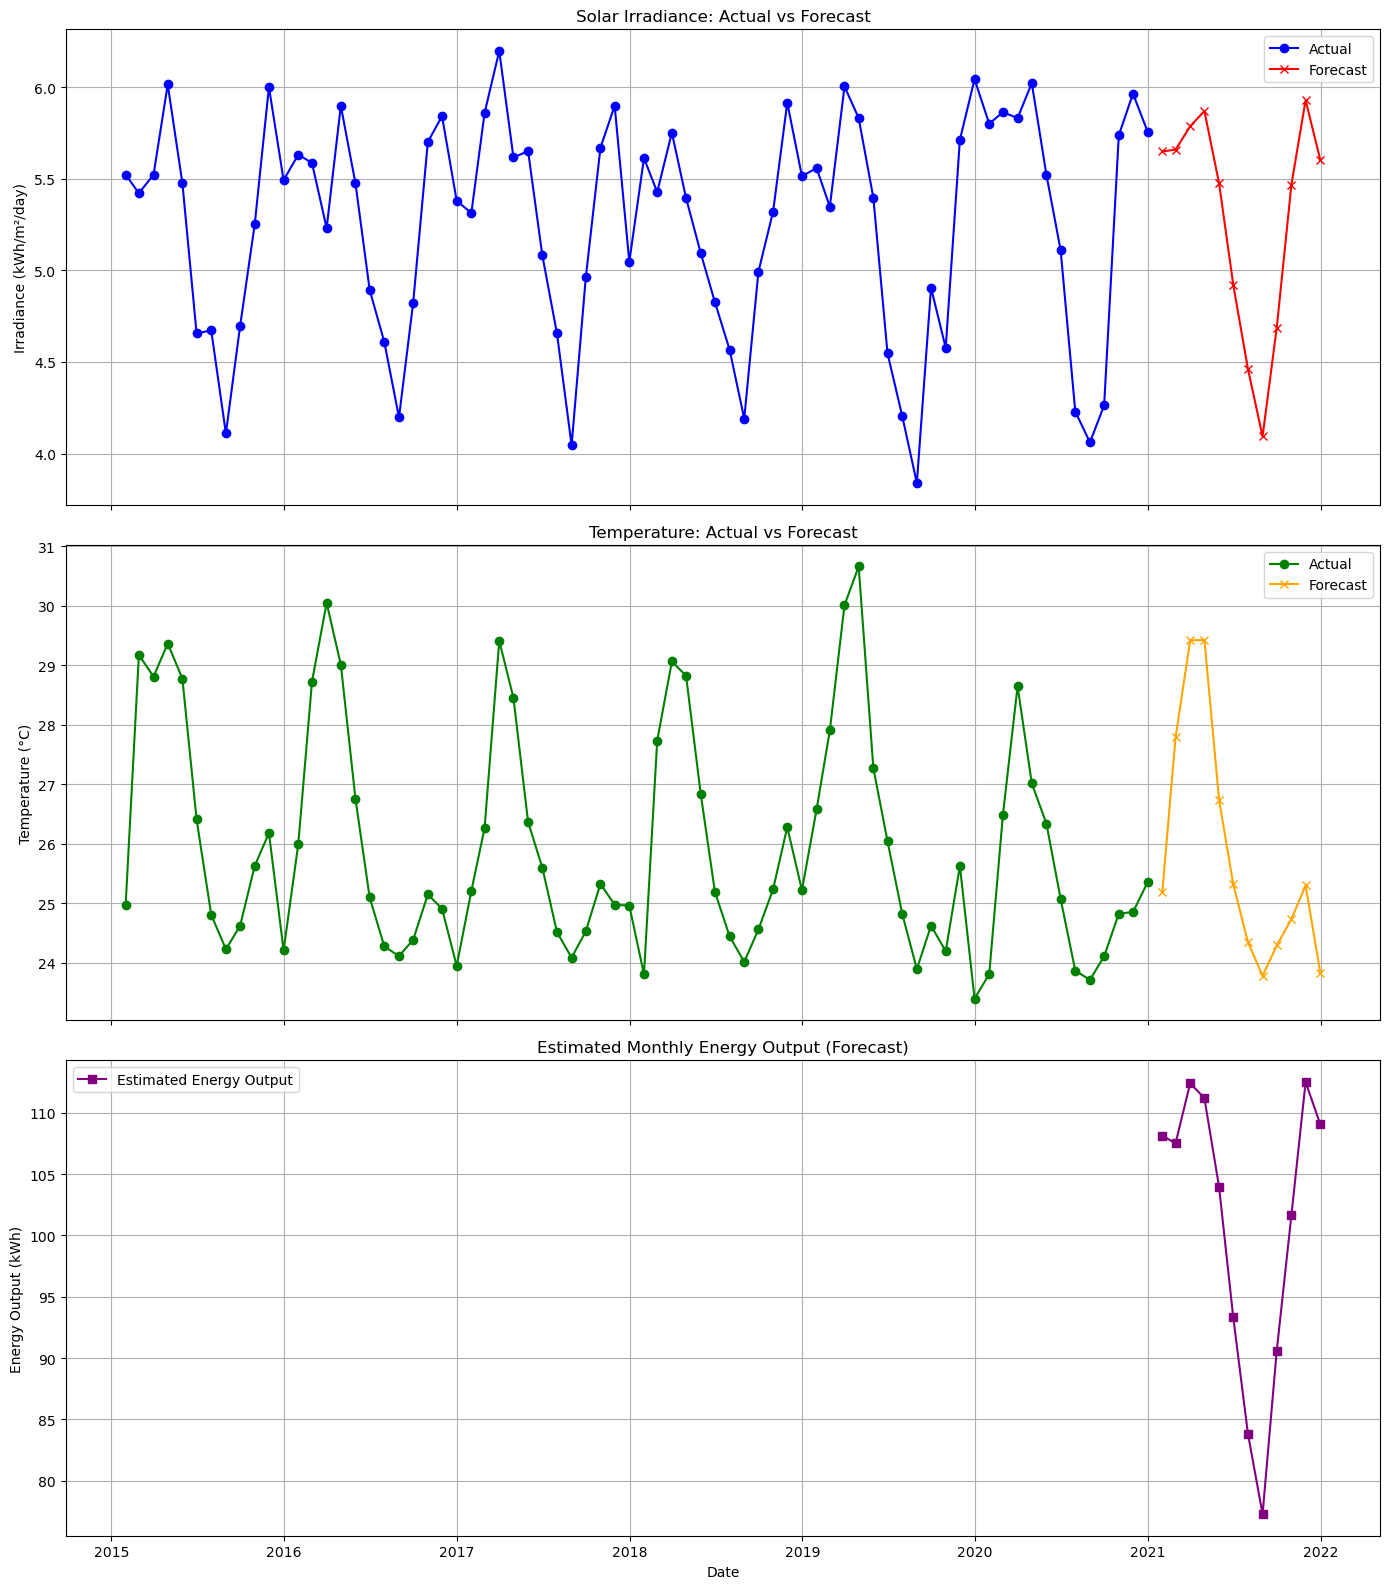

In [36]:
import matplotlib.pyplot as plt

# Assuming your merged DataFrame is called merged_df

fig, axs = plt.subplots(3, 1, figsize=(14, 16), sharex=True)

# 1. Solar Irradiance
axs[0].plot(merged_df.index, merged_df['Solar_Irradiance'], label='Actual', color='blue', marker='o')
axs[0].plot(merged_df.index, merged_df['Solar_Irradiance_Forecast'], label='Forecast', color='red', marker='x')
axs[0].set_ylabel("Irradiance (kWh/m²/day)")
axs[0].set_title("Solar Irradiance: Actual vs Forecast")
axs[0].legend()
axs[0].grid(True)

# 2. Temperature
axs[1].plot(merged_df.index, merged_df['Temp_2m'], label='Actual', color='green', marker='o')
axs[1].plot(merged_df.index, merged_df['Temperature_Forecast'], label='Forecast', color='orange', marker='x')
axs[1].set_ylabel("Temperature (°C)")
axs[1].set_title("Temperature: Actual vs Forecast")
axs[1].legend()
axs[1].grid(True)

# 3. Energy Output
axs[2].plot(merged_df.index, merged_df['Energy_Output_kWh'], label='Estimated Energy Output', color='purple', marker='s')
axs[2].set_ylabel("Energy Output (kWh)")
axs[2].set_title("Estimated Monthly Energy Output (Forecast)")
axs[2].legend()
axs[2].grid(True)

plt.xlabel("Date")
plt.tight_layout()
plt.show()


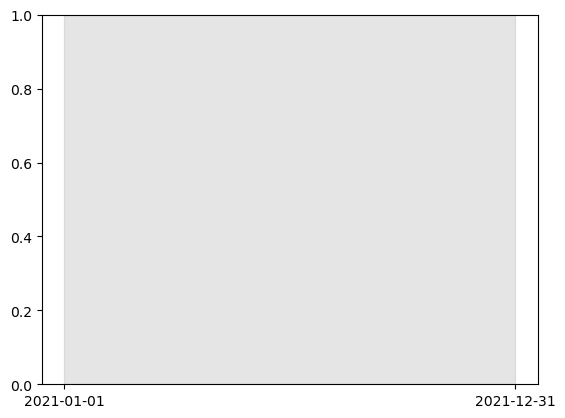

In [37]:
plt.axvspan('2021-01-01', '2021-12-31', color='grey', alpha=0.2, label='Forecast Period')


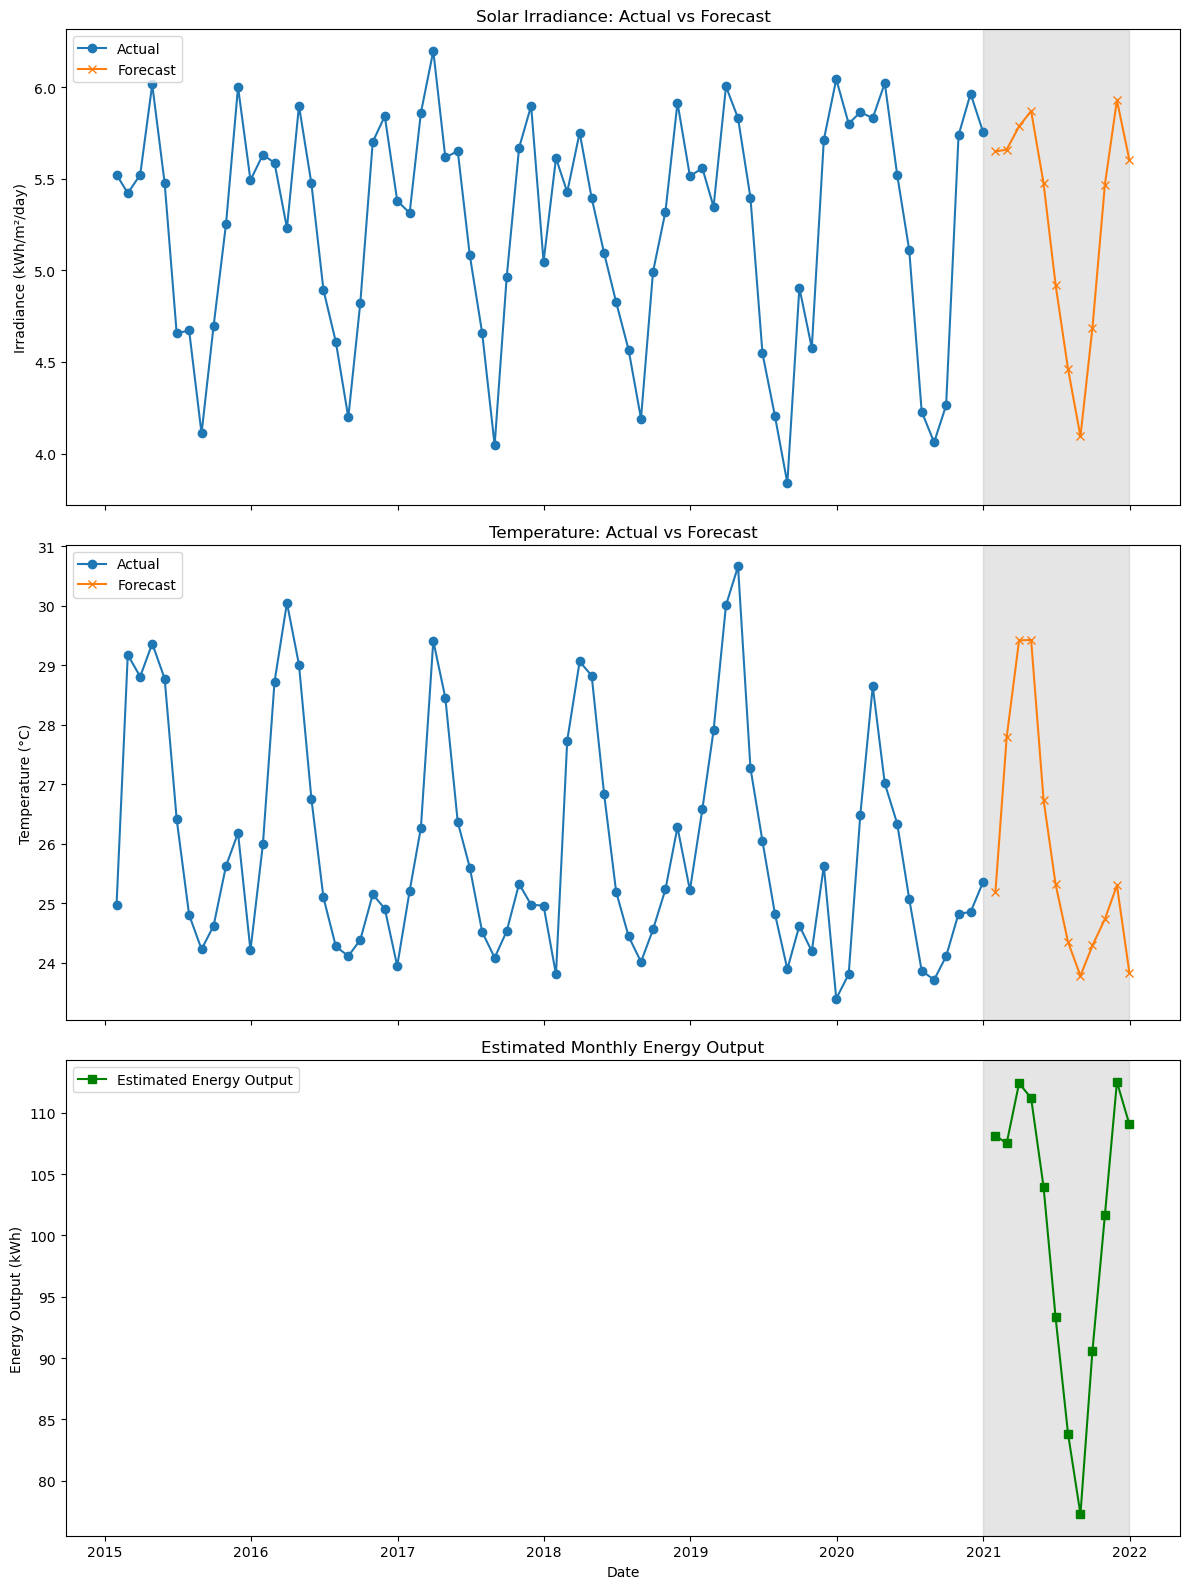

In [38]:
import matplotlib.pyplot as plt

# Define forecast period
forecast_start = '2021-01-01'
forecast_end = '2021-12-31'

fig, axs = plt.subplots(3, 1, figsize=(12, 16), sharex=True)

# 1. Solar Irradiance
axs[0].plot(merged_df.index, merged_df['Solar_Irradiance'], label='Actual', marker='o')
axs[0].plot(merged_df.index, merged_df['Solar_Irradiance_Forecast'], label='Forecast', marker='x')
axs[0].axvspan(forecast_start, forecast_end, color='grey', alpha=0.2)
axs[0].set_ylabel("Irradiance (kWh/m²/day)")
axs[0].legend()
axs[0].set_title("Solar Irradiance: Actual vs Forecast")

# 2. Temperature
axs[1].plot(merged_df.index, merged_df['Temp_2m'], label='Actual', marker='o')
axs[1].plot(merged_df.index, merged_df['Temperature_Forecast'], label='Forecast', marker='x')
axs[1].axvspan(forecast_start, forecast_end, color='grey', alpha=0.2)
axs[1].set_ylabel("Temperature (°C)")
axs[1].legend()
axs[1].set_title("Temperature: Actual vs Forecast")

# 3. Energy Output
axs[2].plot(merged_df.index, merged_df['Energy_Output_kWh'], label='Estimated Energy Output', color='green', marker='s')
axs[2].axvspan(forecast_start, forecast_end, color='grey', alpha=0.2)
axs[2].set_ylabel("Energy Output (kWh)")
axs[2].legend()
axs[2].set_title("Estimated Monthly Energy Output")
axs[2].set_xlabel("Date")

plt.tight_layout()
plt.show()


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Drop rows where either actual or forecast is NaN
valid_data = merged_df.dropna(subset=["Solar_Irradiance", "Solar_Irradiance_Forecast",
                                      "Temp_2m", "Temperature_Forecast"])

# Solar Irradiance Errors
irradiance_mae = mean_absolute_error(valid_data["Solar_Irradiance"], valid_data["Solar_Irradiance_Forecast"])
irradiance_rmse = np.sqrt(mean_squared_error(valid_data["Solar_Irradiance"], valid_data["Solar_Irradiance_Forecast"]))
irradiance_mape = np.mean(np.abs((valid_data["Solar_Irradiance"] - valid_data["Solar_Irradiance_Forecast"]) / valid_data["Solar_Irradiance"])) * 100

# Temperature Errors
temp_mae = mean_absolute_error(valid_data["Temp_2m"], valid_data["Temperature_Forecast"])
temp_rmse = np.sqrt(mean_squared_error(valid_data["Temp_2m"], valid_data["Temperature_Forecast"]))
temp_mape = np.mean(np.abs((valid_data["Temp_2m"] - valid_data["Temperature_Forecast"]) / valid_data["Temp_2m"])) * 100

# Print results
print("Solar Irradiance Forecast Accuracy:")
print(f"MAE: {irradiance_mae:.3f}, RMSE: {irradiance_rmse:.3f}, MAPE: {irradiance_mape:.2f}%\n")

print("Temperature Forecast Accuracy:")
print(f"MAE: {temp_mae:.3f}, RMSE: {temp_rmse:.3f}, MAPE: {temp_mape:.2f}%")


ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assume 'merged_df' has these columns filled for 2021:
# "Solar_Irradiance" (actual)
# "Solar_Irradiance_Forecast"
# "Temp_2m" (actual temperature)
# "Temperature_Forecast"

# Keep only rows where actuals exist
valid_data = merged_df.dropna(subset=["Solar_Irradiance", "Solar_Irradiance_Forecast",
                                      "Temp_2m", "Temperature_Forecast"])

# Solar Irradiance Errors
irradiance_mae = mean_absolute_error(valid_data["Solar_Irradiance"], valid_data["Solar_Irradiance_Forecast"])
irradiance_rmse = np.sqrt(mean_squared_error(valid_data["Solar_Irradiance"], valid_data["Solar_Irradiance_Forecast"]))
irradiance_mape = np.mean(np.abs((valid_data["Solar_Irradiance"] - valid_data["Solar_Irradiance_Forecast"]) / valid_data["Solar_Irradiance"])) * 100

# Temperature Errors
temp_mae = mean_absolute_error(valid_data["Temp_2m"], valid_data["Temperature_Forecast"])
temp_rmse = np.sqrt(mean_squared_error(valid_data["Temp_2m"], valid_data["Temperature_Forecast"]))
temp_mape = np.mean(np.abs((valid_data["Temp_2m"] - valid_data["Temperature_Forecast"]) / valid_data["Temp_2m"])) * 100

# Display
print("Solar Irradiance Forecast Errors:")
print(f"MAE: {irradiance_mae:.3f}, RMSE: {irradiance_rmse:.3f}, MAPE: {irradiance_mape:.2f}%\n")

print("Temperature Forecast Errors:")
print(f"MAE: {temp_mae:.3f}, RMSE: {temp_rmse:.3f}, MAPE: {temp_mape:.2f}%")


ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

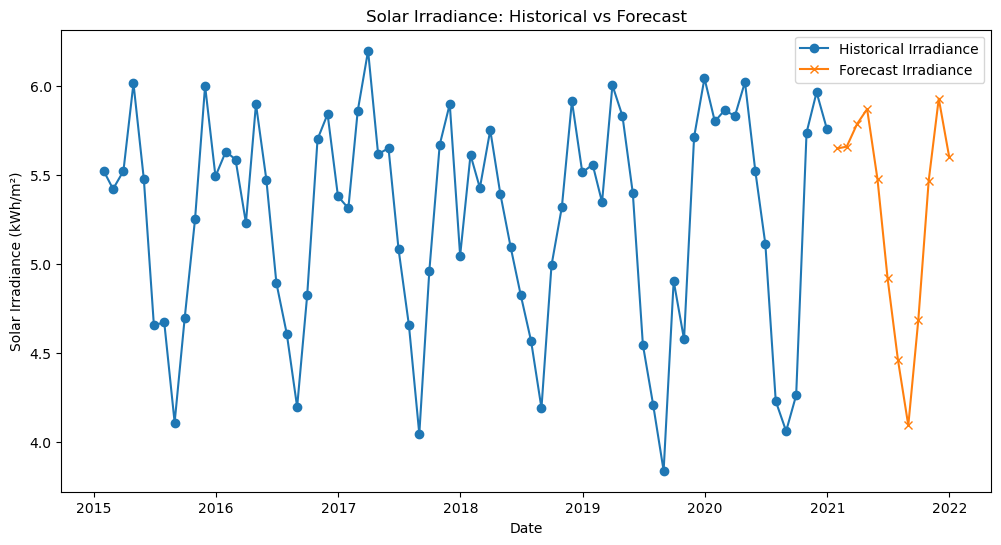

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(merged_df.index, merged_df["Solar_Irradiance"], label="Historical Irradiance", marker='o')
plt.plot(results_df.index, results_df["Solar_Irradiance_Forecast"], label="Forecast Irradiance", marker='x')
plt.xlabel("Date")
plt.ylabel("Solar Irradiance (kWh/m²)")
plt.title("Solar Irradiance: Historical vs Forecast")
plt.legend()
plt.show()
